# import

In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.model import stepmodel

import geopandas as gpd
from shapely import geometry
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
training_folder = '../../'
input_folder = training_folder + r'inputs/'

# read_file

In [3]:
links = gpd.read_file(input_folder+'gtfs/links.geojson', driver='GeoJSON')
nodes = gpd.read_file(input_folder+'gtfs/nodes.geojson', driver='GeoJSON')
zones = gpd.read_file(input_folder+'zones/zones.geojson', driver='GeoJSON')

# set_index with node IDs

In [4]:
nodes.set_index('stop_id', inplace=True)

# cut with convex hull

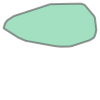

In [5]:
road_nodes = gpd.read_file(input_folder+'road/road_nodes.geojson', driver='GeoJSON')
convex_hull = geometry.MultiPoint(list(road_nodes['geometry'])).convex_hull.buffer(0.002)
convex_hull

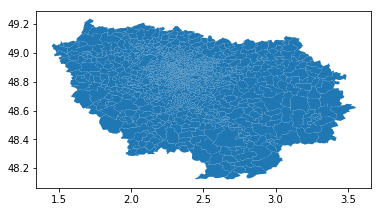

In [6]:
ax = zones.plot()

In [7]:
def cut(gdf, stencil):
    contained = gdf['geometry'].apply(lambda g: stencil.contains(g))
    return gdf.loc[contained]

plt.rcParams['figure.figsize'] = [10, 7]

# initialize_model

In [8]:
sm = stepmodel.StepModel()

Model epsg not defined: setting epsg to default one: 4326
Model coordinates_unit not defined: setting coordinates_unit to default one: degree


In [9]:
sm.links = cut(links, convex_hull)
sm.nodes = cut(nodes, convex_hull)
sm.zones = cut(zones, convex_hull)

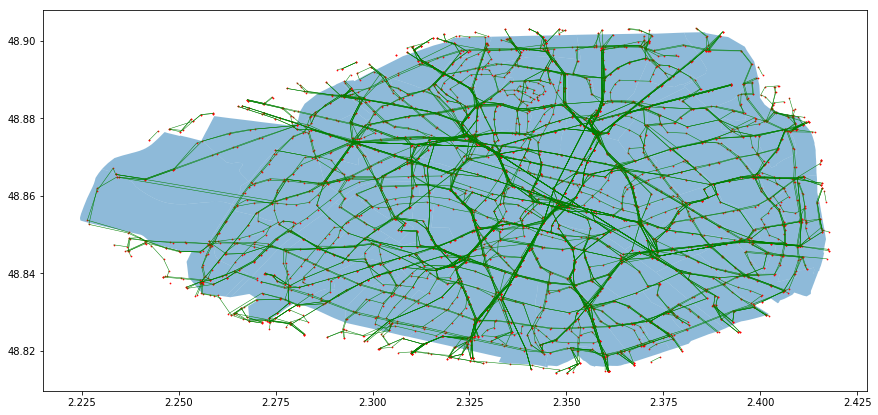

In [10]:
ax = sm.plot('zones', alpha=0.5, figsize=[17, 7])
ax = sm.plot('links', linewidth=0.5, color='green', ax=ax)
plot= sm.plot('nodes', markersize=0.5, color='red', ax=ax)

In [11]:
sm.to_zip(training_folder + r'model/preparation/base.zip')

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 16.74it/s]


# json

In [12]:
sm.to_json(training_folder + r'model/latest')

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  4.19it/s]
